In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pylab
import scipy.stats as stat
from scipy.stats import ttest_ind, chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols
from category_encoders import TargetEncoder
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import os


In [2]:
df = pd.read_csv("Diabetes-dataset_FT.csv")
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.865276,-0.005124,0.928458,-0.815354,0.217978,0.798645,1.556957,1.0
1,-1.205989,-0.542772,0.546002,-0.815354,-0.874679,-0.328392,-0.163949,0.0
2,2.015979,-0.721988,-1.302538,-0.815354,-1.389789,0.982401,-0.073375,1.0
3,-1.074480,-0.542772,0.163545,0.399244,-0.640538,-1.079749,-1.069690,0.0
4,0.503626,-2.872582,0.928458,1.355416,1.700869,0.165203,0.017199,1.0
...,...,...,...,...,...,...,...,...
763,-0.679954,0.353308,1.757114,1.510471,0.108712,-1.063415,2.734419,0.0
764,0.010468,-0.184340,0.418516,-0.815354,0.717478,-0.373310,-0.526245,0.0
765,-0.022409,-0.005124,0.163545,0.631826,-0.937117,-0.761239,-0.254523,0.0
766,0.141977,-1.080421,-1.302538,-0.815354,-0.328351,-0.336558,1.285235,1.0


### SEPARATING DEPENDENT AND INDEPENDENT VARIABLES

In [3]:
X = df.iloc[:,:-1].values
X

array([[ 0.86527574, -0.00512393,  0.92845833, ...,  0.21797752,
         0.79864498,  1.55695702],
       [-1.20598931, -0.54277224,  0.5460018 , ..., -0.87467912,
        -0.32839152, -0.16394935],
       [ 2.01597855, -0.72198835, -1.30253807, ..., -1.38978867,
         0.98240093, -0.07337533],
       ...,
       [-0.02240928, -0.00512393,  0.16354528, ..., -0.93711664,
        -0.76123887, -0.25452337],
       [ 0.14197684, -1.08042056, -1.30253807, ..., -0.3283508 ,
        -0.33655845,  1.28523497],
       [-0.94297153, -0.18434003,  0.67348731, ..., -0.28152266,
        -0.47539628, -0.88854151]])

In [4]:
Y = df.iloc[:,-1].values
Y

array([1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 0.

### TEST TRAIN SPLIT

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.66, shuffle=True)

## __MODEL SELECTION__

In [6]:
from sklearn import metrics
from sklearn.metrics import classification_report

### LOGISTIC REGRESSION

In [7]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=16)
lr.fit(X_train, Y_train)
Y_pred = lr.predict(X_test)
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print("-"*70)
print("Report")
print("-"*70)
print("Confusion Matrix:")
print(str(confusion_matrix))
target_names = ['without diabetes', 'with diabetes']
acc=(confusion_matrix[0][0] + confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1])
print("Accuracy by confusion matrix: "+str(acc))
print("\n")
print(classification_report(Y_test, Y_pred, target_names=target_names))
print("-"*70)

----------------------------------------------------------------------
Report
----------------------------------------------------------------------
Confusion Matrix:
[[152  24]
 [ 38  48]]
Accuracy by confusion matrix: 0.7633587786259542


                  precision    recall  f1-score   support

without diabetes       0.80      0.86      0.83       176
   with diabetes       0.67      0.56      0.61        86

        accuracy                           0.76       262
       macro avg       0.73      0.71      0.72       262
    weighted avg       0.76      0.76      0.76       262

----------------------------------------------------------------------


### NAIVE BAYES

In [8]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
Y_pred = gnb.predict(X_test)
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print("-"*70)
print("Report")
print("-"*70)
print("Confusion Matrix:")
print(str(confusion_matrix))
target_names = ['without diabetes', 'with diabetes']
acc=(confusion_matrix[0][0] + confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1])
print("Accuracy by confusion matrix: "+str(acc))
print("\n")
print(classification_report(Y_test, Y_pred, target_names=target_names))
print("-"*70)

----------------------------------------------------------------------
Report
----------------------------------------------------------------------
Confusion Matrix:
[[149  27]
 [ 35  51]]
Accuracy by confusion matrix: 0.7633587786259542


                  precision    recall  f1-score   support

without diabetes       0.81      0.85      0.83       176
   with diabetes       0.65      0.59      0.62        86

        accuracy                           0.76       262
       macro avg       0.73      0.72      0.72       262
    weighted avg       0.76      0.76      0.76       262

----------------------------------------------------------------------


### K-NEAREST NEIGHBORS

In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print("-"*70)
print("Report")
print("-"*70)
print("Confusion Matrix:")
print(str(confusion_matrix))
target_names = ['without diabetes', 'with diabetes']
acc=(confusion_matrix[0][0] + confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1])
print("Accuracy by confusion matrix: "+str(acc))
print("\n")
print(classification_report(Y_test, Y_pred, target_names=target_names))
print("-"*70)

----------------------------------------------------------------------
Report
----------------------------------------------------------------------
Confusion Matrix:
[[143  33]
 [ 35  51]]
Accuracy by confusion matrix: 0.7404580152671756


                  precision    recall  f1-score   support

without diabetes       0.80      0.81      0.81       176
   with diabetes       0.61      0.59      0.60        86

        accuracy                           0.74       262
       macro avg       0.71      0.70      0.70       262
    weighted avg       0.74      0.74      0.74       262

----------------------------------------------------------------------


### DECISION TREE

In [10]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)
Y_pred = dt.predict(X_test)
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print("-"*70)
print("Report")
print("-"*70)
print("Confusion Matrix:")
print(str(confusion_matrix))
target_names = ['without diabetes', 'with diabetes']
acc=(confusion_matrix[0][0] + confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1])
print("Accuracy by confusion matrix: "+str(acc))
print("\n")
print(classification_report(Y_test, Y_pred, target_names=target_names))
print("-"*70)

----------------------------------------------------------------------
Report
----------------------------------------------------------------------
Confusion Matrix:
[[123  53]
 [ 40  46]]
Accuracy by confusion matrix: 0.6450381679389313


                  precision    recall  f1-score   support

without diabetes       0.75      0.70      0.73       176
   with diabetes       0.46      0.53      0.50        86

        accuracy                           0.65       262
       macro avg       0.61      0.62      0.61       262
    weighted avg       0.66      0.65      0.65       262

----------------------------------------------------------------------


### SUPPORT VECTOR CLASSIFIER

In [11]:
from sklearn import svm
svm = svm.SVC(kernel='poly') 
svm.fit(X_train, Y_train)
Y_pred = svm.predict(X_test)
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print("-"*70)
print("Report")
print("-"*70)
print("Confusion Matrix:")
print(str(confusion_matrix))
target_names = ['without diabetes', 'with diabetes']
acc=(confusion_matrix[0][0] + confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1])
print("Accuracy by confusion matrix: "+str(acc))
print("\n")
print(classification_report(Y_test, Y_pred, target_names=target_names))
print("-"*70)

----------------------------------------------------------------------
Report
----------------------------------------------------------------------
Confusion Matrix:
[[162  14]
 [ 51  35]]
Accuracy by confusion matrix: 0.7519083969465649


                  precision    recall  f1-score   support

without diabetes       0.76      0.92      0.83       176
   with diabetes       0.71      0.41      0.52        86

        accuracy                           0.75       262
       macro avg       0.74      0.66      0.68       262
    weighted avg       0.75      0.75      0.73       262

----------------------------------------------------------------------


## __HYPEROARAMETRIC TUNNING__

### LOGISTIC REGRESSION

In [12]:
from sklearn.model_selection import RepeatedStratifiedKFold
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.770825 using {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.768210 (0.041727) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.768210 (0.041727) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.768210 (0.041727) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.768210 (0.041727) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.768210 (0.041727) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.768210 (0.041727) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.768643 (0.041093) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.768643 (0.041093) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.767777 (0.041135) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.770398 (0.041642) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.770398 (0.041642) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.770825 (0.041311) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.758675 (0.043801) wit

In [17]:
lr = LogisticRegression(random_state=16,C=0.1,penalty='l2',
    dual=False,
    tol=0.0001,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    solver='liblinear',
    max_iter=100,
    multi_class='auto',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,)

lr.fit(X_train, Y_train)
Y_pred = lr.predict(X)
confusion_matrix = metrics.confusion_matrix(Y, Y_pred)
print("-"*70)
print("Report")
print("-"*70)
print("Confusion Matrix:")
print(str(confusion_matrix))
target_names = ['without diabetes', 'with diabetes']
acc=(confusion_matrix[0][0] + confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1])
print("Accuracy by confusion matrix: "+str(acc))
print("\n")
print(classification_report(Y, Y_pred, target_names=target_names))
print("-"*70)
import warnings
warnings.filterwarnings('ignore')

----------------------------------------------------------------------
Report
----------------------------------------------------------------------
Confusion Matrix:
[[436  64]
 [107 161]]
Accuracy by confusion matrix: 0.77734375


                  precision    recall  f1-score   support

without diabetes       0.80      0.87      0.84       500
   with diabetes       0.72      0.60      0.65       268

        accuracy                           0.78       768
       macro avg       0.76      0.74      0.74       768
    weighted avg       0.77      0.78      0.77       768

----------------------------------------------------------------------


C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [18]:
import pickle
pickle.dump(lr, open('lr.pkl','wb'))

## EVALUATING RESULTS

In [23]:

df_copy= pd.read_csv("Diabetes-preprocessed.csv")

In [24]:
df_copy

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148.0,72.0,35.0,0.0,33.6,0.627000,50.0,1.0
1,85.0,66.0,29.0,0.0,26.6,0.351000,31.0,0.0
2,183.0,64.0,0.0,0.0,23.3,0.672000,32.0,1.0
3,89.0,66.0,23.0,94.0,28.1,0.167000,21.0,0.0
4,137.0,40.0,35.0,168.0,43.1,0.471876,33.0,1.0
...,...,...,...,...,...,...,...,...
763,101.0,76.0,48.0,180.0,32.9,0.171000,63.0,0.0
764,122.0,70.0,27.0,0.0,36.8,0.340000,27.0,0.0
765,121.0,72.0,23.0,112.0,26.2,0.245000,30.0,0.0
766,126.0,60.0,0.0,0.0,30.1,0.349000,47.0,1.0


In [25]:
Y_pred = pd.DataFrame(Y_pred, columns = ['Y_pred'])

In [26]:
df_results = pd.concat([df_copy, Y_pred], axis=1)
df_results

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Y_pred
0,148.0,72.0,35.0,0.0,33.6,0.627000,50.0,1.0,1.0
1,85.0,66.0,29.0,0.0,26.6,0.351000,31.0,0.0,0.0
2,183.0,64.0,0.0,0.0,23.3,0.672000,32.0,1.0,1.0
3,89.0,66.0,23.0,94.0,28.1,0.167000,21.0,0.0,0.0
4,137.0,40.0,35.0,168.0,43.1,0.471876,33.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
763,101.0,76.0,48.0,180.0,32.9,0.171000,63.0,0.0,0.0
764,122.0,70.0,27.0,0.0,36.8,0.340000,27.0,0.0,0.0
765,121.0,72.0,23.0,112.0,26.2,0.245000,30.0,0.0,0.0
766,126.0,60.0,0.0,0.0,30.1,0.349000,47.0,1.0,0.0


In [27]:
df_results.to_csv('Diabetes-dataset_RS.csv', encoding='utf-8', index=False)

## VISUALISING RESULTS

In [30]:
dataplot = sns.heatmap(confusion_matrix, cmap = 'PuRd', annot = True, center = 0)

In [31]:
plt.rcParams["figure.figsize"] = [10.50, 4.50]
plt.rcParams["figure.autolayout"] = True
figure, axis = plt.subplots(1, 2)

colors = {0:'MEDIUMVIOLETRED', 1:'INDIGO'}
 
df_results.plot.scatter("Glucose","DiabetesPedigreeFunction",title="Acctual",ax=axis[0],c=df_results['Outcome'].map(colors))
df_results.plot.scatter("Glucose","DiabetesPedigreeFunction",title="Predicted",ax=axis[1],c=df_results['Y_pred'].map(colors))

<Axes: title={'center': 'Predicted'}, xlabel='Glucose', ylabel='DiabetesPedigreeFunction'>

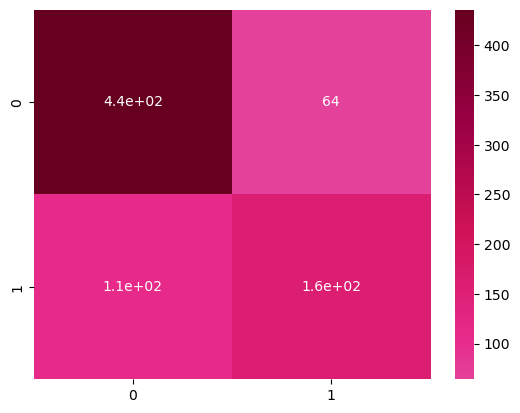

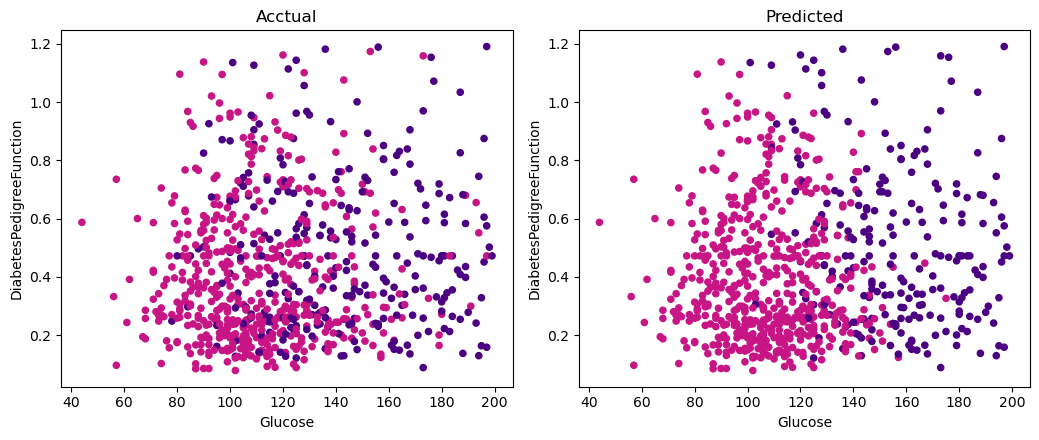

In [32]:
plt.show()